In [ ]:
import numpy as np
import pandas as pd

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df=pd.read_csv('/fraudTrain.csv')
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495.0,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1.325376e+09,36.011293,-82.048315,0.0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149.0,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1.325376e+09,49.159047,-118.186462,0.0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154.0,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1.325376e+09,43.150704,-112.154481,0.0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939.0,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1.325376e+09,47.034331,-112.561071,0.0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99.0,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1.325376e+09,38.674999,-78.632459,0.0


In [ ]:
df.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [ ]:
len(df['cc_num'])

27259

In [ ]:
dff=df[['amt','zip','lat','long','city_pop','unix_time',
       'merch_lat', 'merch_long']]
df['trans_date_trans_time']=pd.to_datetime(df['trans_date_trans_time'])
dff['time']=df['trans_date_trans_time'].dt.minute*60 + df['trans_date_trans_time'].dt.second + df['trans_date_trans_time'].dt.hour*60*60
dff['tran_mon']=df['trans_date_trans_time'].dt.month
dff['trans_day']=df['trans_date_trans_time'].dt.day
dff['trans_year']=df['trans_date_trans_time'].dt.year
dff['fraud_det']=df['is_fraud']
dff.head(10)

<ipython-input-114-cbd4ad907bd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['time']=df['trans_date_trans_time'].dt.minute*60 + df['trans_date_trans_time'].dt.second + df['trans_date_trans_time'].dt.hour*60*60
<ipython-input-114-cbd4ad907bd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dff['tran_mon']=df['trans_date_trans_time'].dt.month
<ipython-input-114-cbd4ad907bd2>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,time,tran_mon,trans_day,trans_year,fraud_det
0,4.97,28654.0,36.0788,-81.1781,3495.0,1.325376e+09,36.011293,-82.048315,18,1,1,2019,0.0
1,107.23,99160.0,48.8878,-118.2105,149.0,1.325376e+09,49.159047,-118.186462,44,1,1,2019,0.0
2,220.11,83252.0,42.1808,-112.2620,4154.0,1.325376e+09,43.150704,-112.154481,51,1,1,2019,0.0
3,45.00,59632.0,46.2306,-112.1138,1939.0,1.325376e+09,47.034331,-112.561071,76,1,1,2019,0.0
4,41.96,24433.0,38.4207,-79.4629,99.0,1.325376e+09,38.674999,-78.632459,186,1,1,2019,0.0
5,94.63,18917.0,40.3750,-75.2045,2158.0,1.325376e+09,40.653382,-76.152667,248,1,1,2019,0.0
6,44.54,67851.0,37.9931,-100.9893,2691.0,1.325376e+09,37.162705,-100.153370,282,1,1,2019,0.0
7,71.65,22824.0,38.8432,-78.6003,6018.0,1.325376e+09,38.948089,-78.540296,308,1,1,2019,0.0
8,4.27,15665.0,40.3359,-79.6607,1472.0,1.325376e+09,40.351813,-79.958146,318,1,1,2019,0.0
9,198.39,37040.0,36.5220,-87.3490,151785.0,1.325376e+09,37.179198,-87.485381,361,1,1,2019,0.0


In [ ]:
X=dff[[i for i in dff.columns if i!='fraud_det']]
Y=dff['fraud_det']

In [ ]:
x_tr,x_te,y_tr,y_te=train_test_split(X,Y,test_size=.3)
model=LogisticRegression()
model.fit(x_tr,y_tr)

LogisticRegression()

In [ ]:
def heat_map(cm):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.show()

In [ ]:
print(x_te.shape)
print(y_te.shape)

(8178, 12)
(8178,)


In [ ]:
print(len(x_te))

8178


In [ ]:
if x_te.shape[0] != y_te.shape[0]:
    # Trim the extra sample from x_te
    x_te = x_te[:-1]

In [ ]:
missing_values = x_te.isnull().sum()
print(missing_values)



amt           0
zip           1
lat           1
long          1
city_pop      1
unix_time     1
merch_lat     1
merch_long    1
time          0
tran_mon      0
trans_day     0
trans_year    0
dtype: int64


In [ ]:
x_te = x_te.dropna()

# Option 2: Impute missing values
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy="mean")
x_te = imputer.fit_transform(x_te)

In [ ]:
# If y_te is missing a row, add a dummy row
if x_te.shape[0] > y_te.shape[0]:
    y_te = np.append(y_te, [0])

# If y_te has an extra row, remove the last row
elif x_te.shape[0] < y_te.shape[0]:
    y_te = y_te[:-1]

# If the shapes are already consistent, proceed
else:
    pass

In [ ]:
print(y_te)

1137     0.0
13558    0.0
9833     0.0
2327     0.0
3219     0.0
        ... 
17058    0.0
9829     0.0
3329     0.0
10973    0.0
20136    0.0
Name: fraud_det, Length: 8177, dtype: float64


In [ ]:
y_te = y_te.fillna(0)

Accuracy Score is  0.9921731686437569
[[8113    0]
 [  64    0]]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


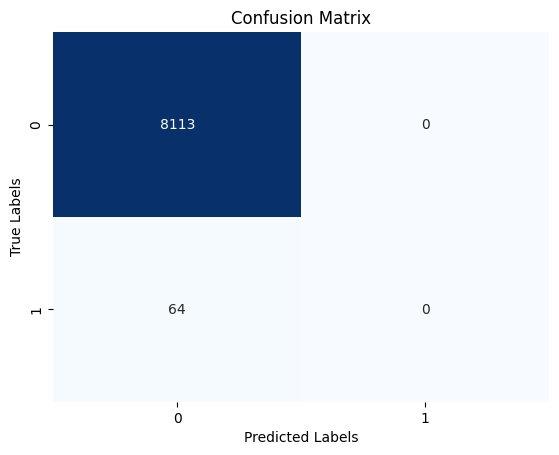

In [ ]:
y_pre=model.predict(x_te)
print("Accuracy Score is ",accuracy_score(y_te,y_pre))
print(confusion_matrix(y_te,y_pre))
heat_map(confusion_matrix(y_te,y_pre))

In [ ]:
test_frame=pd.read_csv('/fraudTest.csv')
test_frame['trans_date_trans_time']=pd.to_datetime(test_frame['trans_date_trans_time'])
X=test_frame[['amt','zip','lat','long','city_pop','unix_time',
       'merch_lat', 'merch_long']]
X['time']=test_frame['trans_date_trans_time'].dt.minute*60 + test_frame['trans_date_trans_time'].dt.second + test_frame['trans_date_trans_time'].dt.hour*60*60
X['tran_mon']=test_frame['trans_date_trans_time'].dt.month
X['trans_day']=test_frame['trans_date_trans_time'].dt.day
X['trans_year']=test_frame['trans_date_trans_time'].dt.year
Y=test_frame['is_fraud']

<ipython-input-131-55f9493e9b27>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['time']=test_frame['trans_date_trans_time'].dt.minute*60 + test_frame['trans_date_trans_time'].dt.second + test_frame['trans_date_trans_time'].dt.hour*60*60
<ipython-input-131-55f9493e9b27>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['tran_mon']=test_frame['trans_date_trans_time'].dt.month
<ipython-input-131-55f9493e9b27>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Tr

In [ ]:
df = pd.DataFrame(X)
df.isnull().sum()

amt           0
zip           0
lat           0
long          0
city_pop      0
unix_time     0
merch_lat     0
merch_long    1
time          0
tran_mon      0
trans_day     0
trans_year    0
dtype: int64

In [ ]:
df = df.dropna()
X = df.values

In [ ]:
missing_values = Y.isnull().sum()
print(f"Number of missing values in Y: {missing_values}")

Number of missing values in Y: 1


In [ ]:
Y = Y.dropna()

Accuracy_Score :  0.9969835055516334
confusion_Matrix :  [[15534     0]
 [   47     0]]


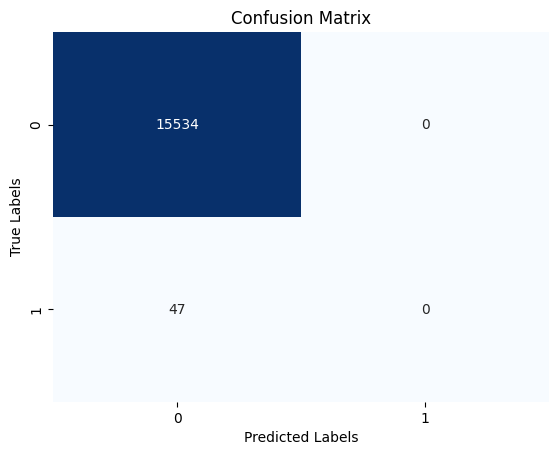

In [ ]:
model = LogisticRegression()
model.fit(X, Y)
y_pred = model.predict(X)
print('Accuracy_Score : ', accuracy_score(Y, y_pred))
print('confusion_Matrix : ', confusion_matrix(Y, y_pred))
heat_map(confusion_matrix(Y,y_pred))